In [ ]:
#%%

import numpy             as np
import pandas            as pd
import mplfinance        as mpf
import matplotlib.pyplot as plt
from   scipy.stats       import t

In [ ]:
#%%

symbol = "ES_20240301_20240806"
#symbol = "NKD_20240301_20240806"

df = pd.read_csv(f"./data/{symbol}_1min.csv", parse_dates=True, index_col=0)
#df = df["2024-06-15":]
df.dropna(inplace=True)

<Axes: xlabel='Date'>

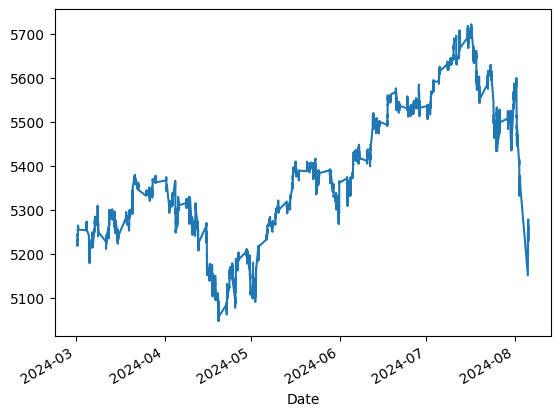

In [ ]:
#%%

df['Close'].plot()

<Axes: xlabel='Date'>

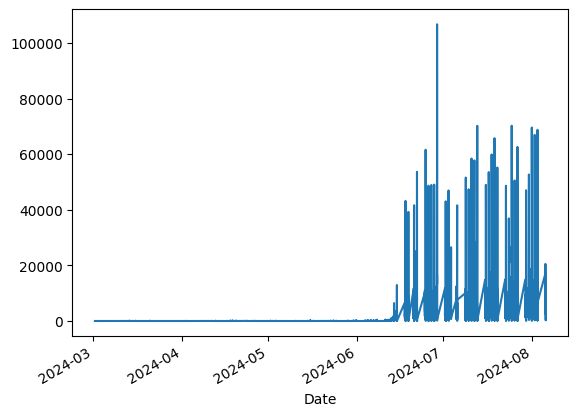

In [ ]:
#%%

df['Volume'].plot()

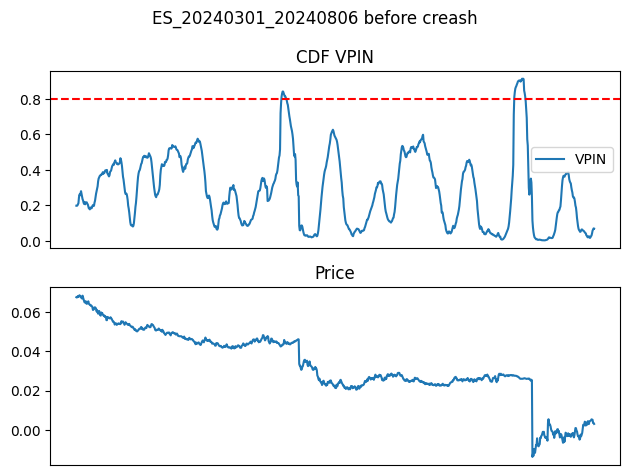

In [ ]:
#%%

SIGMA_WINDOW  = 40
DOF           = 0.25
VOLUME_WINDOW = 25
VPIN_WINDOW   = 30
VPIN_SMOOTH   = 5


df['cum_log_return'] = (df['Close']/df['Close'].iloc[0]).apply(np.log)
df['return'        ] = df['cum_log_return'].diff().fillna(0.0)
df['sigma'         ] = df['return'].rolling(SIGMA_WINDOW).std().fillna(0.0)

def label(r, sigma):
    if sigma>0.0:
        cum = t.cdf(r/sigma, df=DOF)
        return 2*cum-1.0
    else:
        return 0.0

df['label'       ] = df.apply(lambda x: label(x['return'], x['sigma']), axis=1)
df['volume_sign' ] = df['label'].apply(np.sign)
df['volume_label'] = df['Volume']*df['volume_sign']


def sum_positives(arr):
    arr = np.array(arr)
    return np.sum(arr[arr>=0])
def sum_negatives(arr):
    arr = np.array(arr)
    return np.abs(np.sum(arr[arr<0]))

df["buy_volume" ] = df['volume_label'].rolling(VOLUME_WINDOW).apply(lambda w: sum_positives(w.values))
df['sell_volume'] = df['volume_label'].rolling(VOLUME_WINDOW).apply(lambda w: sum_negatives(w.values))

def calculate_vpin(buy_volume, sell_volume, window_size):
    vpin  = buy_volume.sub(sell_volume).abs().rolling(window_size).mean()
    vpin /= (buy_volume+sell_volume)
    return vpin

df['vpin'           ] = calculate_vpin(df['buy_volume'], df['sell_volume'], VPIN_WINDOW)
df['cdf_vpin'       ] = df['vpin'    ].rank(method='average', pct=True)
df['cdf_vpin_smooth'] = df['cdf_vpin'].ewm(span=VPIN_SMOOTH,min_periods=0,adjust=False,ignore_na=False).mean()


plot_window = 1000
start_idx   = -(plot_window+100)
plot_df = df.iloc[start_idx:start_idx+plot_window].copy()
plot_df.index = plot_df.index.astype(str)

fig, axs = plt.subplots(2)
fig.suptitle(f"{symbol} before creash")
axs[0].plot(plot_df[[ 'cdf_vpin']])
axs[0].axhline(y=0.8, color='r', linestyle = '--') 
axs[1].plot(plot_df['cum_log_return'])
axs[0].set_title('CDF VPIN')
axs[0].set_xticks([])
axs[0].legend(['VPIN'])
axs[1].set_title('Price')
axs[1].set_xticks([])
plt.tight_layout()
plt.show();

In [ ]:
#%%

#symbol = "ES_20240301_20240806"
symbol = "NKD_20240301_20240806"

df = pd.read_csv(f"./data/{symbol}_1min.csv", parse_dates=True, index_col=0)
#df = df["2024-06-15":]
df.dropna(inplace=True)

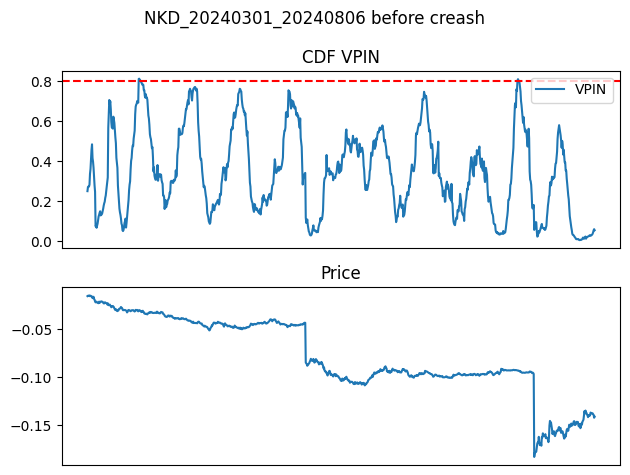

In [ ]:
#%%

SIGMA_WINDOW  = 40
DOF           = 0.25
VOLUME_WINDOW = 25
VPIN_WINDOW   = 30
VPIN_SMOOTH   = 5


df['cum_log_return'] = (df['Close']/df['Close'].iloc[0]).apply(np.log)
df['return'        ] = df['cum_log_return'].diff().fillna(0.0)
df['sigma'         ] = df['return'].rolling(SIGMA_WINDOW).std().fillna(0.0)

def label(r, sigma):
    if sigma>0.0:
        cum = t.cdf(r/sigma, df=DOF)
        return 2*cum-1.0
    else:
        return 0.0

df['label'       ] = df.apply(lambda x: label(x['return'], x['sigma']), axis=1)
df['volume_sign' ] = df['label'].apply(np.sign)
df['volume_label'] = df['Volume']*df['volume_sign']


def sum_positives(arr):
    arr = np.array(arr)
    return np.sum(arr[arr>=0])
def sum_negatives(arr):
    arr = np.array(arr)
    return np.abs(np.sum(arr[arr<0]))

df["buy_volume" ] = df['volume_label'].rolling(VOLUME_WINDOW).apply(lambda w: sum_positives(w.values))
df['sell_volume'] = df['volume_label'].rolling(VOLUME_WINDOW).apply(lambda w: sum_negatives(w.values))

def calculate_vpin(buy_volume, sell_volume, window_size):
    vpin  = buy_volume.sub(sell_volume).abs().rolling(window_size).mean()
    vpin /= (buy_volume+sell_volume)
    return vpin

df['vpin'           ] = calculate_vpin(df['buy_volume'], df['sell_volume'], VPIN_WINDOW)
df['cdf_vpin'       ] = df['vpin'    ].rank(method='average', pct=True)
df['cdf_vpin_smooth'] = df['cdf_vpin'].ewm(span=VPIN_SMOOTH,min_periods=0,adjust=False,ignore_na=False).mean()


plot_window = 1000
start_idx   = -(plot_window+100)
plot_df = df.iloc[start_idx:start_idx+plot_window].copy()
plot_df.index = plot_df.index.astype(str)

fig, axs = plt.subplots(2)
fig.suptitle(f"{symbol} before creash")
axs[0].plot(plot_df[[ 'cdf_vpin']])
axs[0].axhline(y=0.8, color='r', linestyle = '--') 
axs[1].plot(plot_df['cum_log_return'])
axs[0].set_title('CDF VPIN')
axs[0].set_xticks([])
axs[0].legend(['VPIN'])
axs[1].set_title('Price')
axs[1].set_xticks([])
plt.tight_layout()
plt.show();